# About this dataset
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.



In [1]:
pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 3.9MB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


# Import libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import *
import sys
from pylab import *
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as sch
plt.style.use("fivethirtyeight")


# Read csv file

In [2]:
data_set=pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Data defining

In [3]:
data_set.shape

(299, 13)

In [4]:
data_set.head()   # It also has the target column

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Drop the target column

In [5]:
data = data_set.drop("DEATH_EVENT",axis=1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [6]:
y = data_set.DEATH_EVENT      # The target column

In [7]:
data.shape

(299, 12)

In [8]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


# Data analysis

<AxesSubplot:>

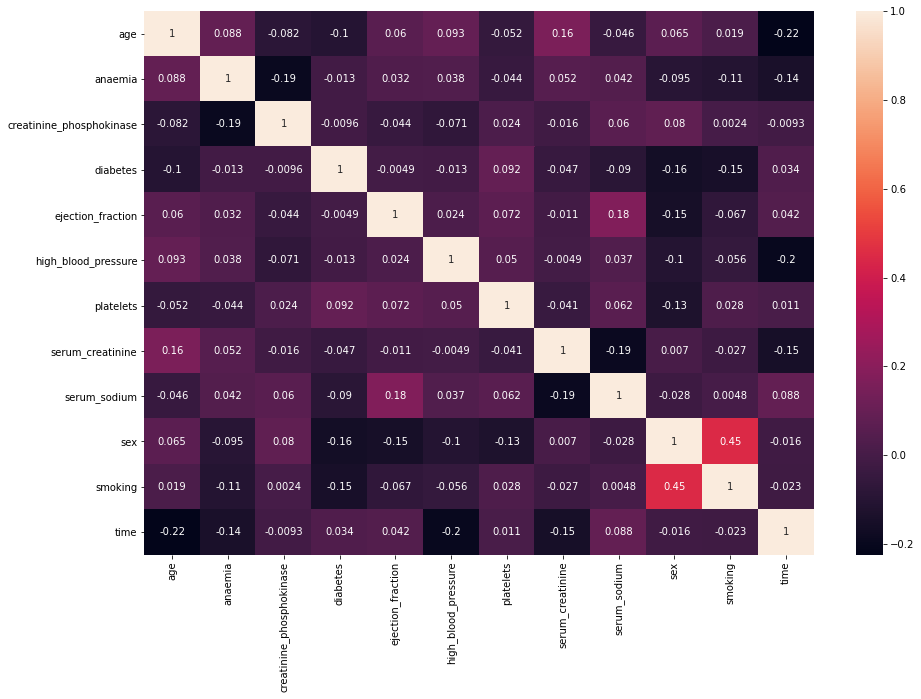

In [9]:
# Correlation diagrame 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

<AxesSubplot:title={'center':'Correlation with target'}>

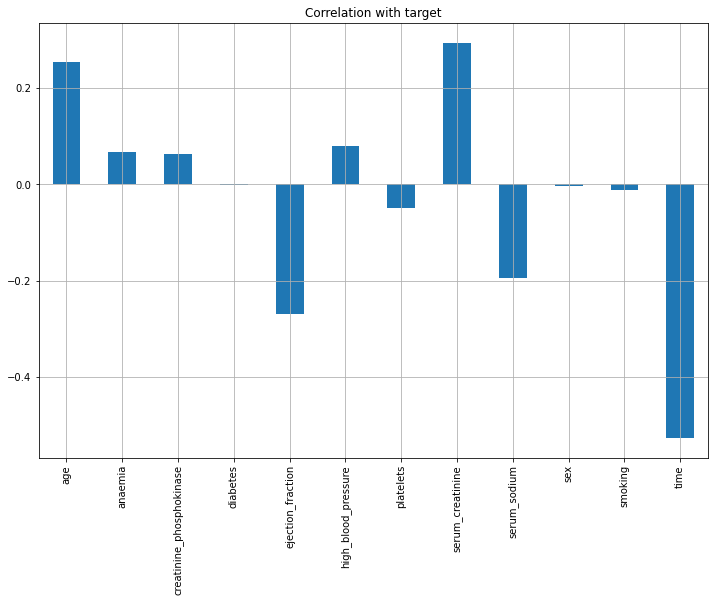

In [10]:
data.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

### From those two diagrams, we detect that the target has the highest correlation with the (Age && serum_creatinine) 

# Outliers detection

C:\Users\nourh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='serum_creatinine'>

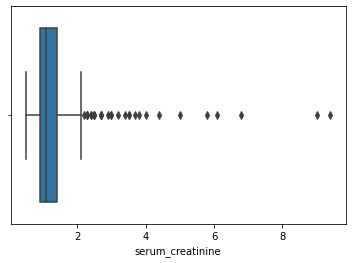

In [11]:
import seaborn as sns
sns.boxplot(data['serum_creatinine'])

In [12]:
# Position of the Outlier
print(np.where(data['serum_creatinine']>2))

(array([  4,   5,   9,  10,  28,  31,  35,  38,  39,  48,  52,  54,  56,
        61,  65,  82, 104, 117, 124, 126, 129, 131, 137, 150, 167, 183,
       187, 190, 203, 217, 228, 247, 281, 282], dtype=int64),)


In [13]:
print("Old Shape: ", data.shape) 

Old Shape:  (299, 12)


## As we conclude that there are outliers, so we must remove them

# Outliers removal

In [14]:
# calculation of first and third percentile

Q1 = np.percentile(data['serum_creatinine'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(data['serum_creatinine'], 75,
                   interpolation = 'midpoint') 
IQR = Q3 - Q1 

In [15]:
# Upper bound
upper = np.where(data['serum_creatinine'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['serum_creatinine'] <= (Q1-1.5*IQR))

In [16]:
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
  
print("New Shape: ", data.shape) 

New Shape:  (270, 12)


# We will work on the age(column0) and serum_cretanine (column 7)

In [17]:
correlatedData = data.iloc[:,[0,7]].values

# Hierarichal Clustering

#### Fitting for Dendrogram when we use "Average Linkage".

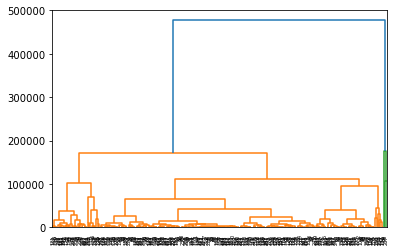

In [18]:
dendrogram = sch.dendrogram(sch.linkage(data,"average"))

### From this Dendrogram, we deduced that the data will have only two clusters.

### Fitting the correlated data (two features) with respect to "Average Linkage".

In [19]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage="average")
cluster.fit_predict(correlatedData)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

### scattering with respect to the "Average Linkage".

(10.0, 100.0)

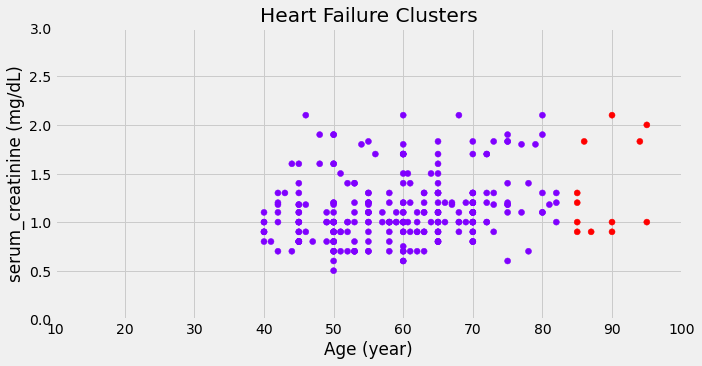

In [31]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(correlatedData[:, 0],correlatedData[:, 1], c= cluster.labels_, cmap = "rainbow")
plt.title('Heart Failure Clusters')
plt.xlabel('Age (year)')
plt.ylabel('serum_creatinine (mg/dL)')
plt.ylim(0, 3)
plt.xlim(10,100)


# K-Medoids algorithm

## We worked with two clusters as we deduced from the dendrogram.

In [21]:
k_medoid_cluster=KMedoids(n_clusters=2,metric="manhattan",init="random")

### Fitting the correlated data (two features).

In [22]:
k_medoid_cluster.fit_predict(correlatedData)

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0], dtype=int64)

### scattering the data.

(10.0, 100.0)

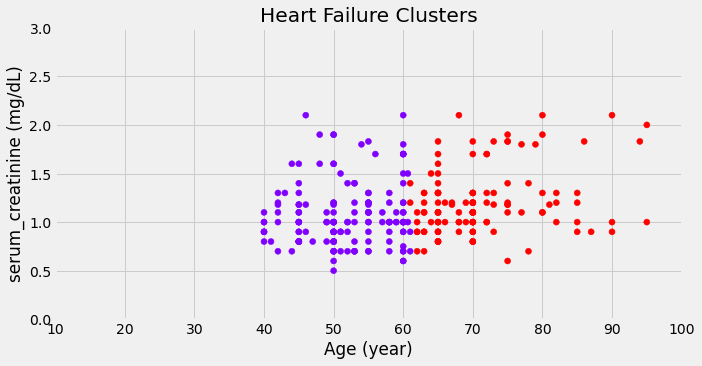

In [30]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(correlatedData[:,0],correlatedData[:,1],c=k_medoid_cluster.labels_ , cmap="rainbow",)
plt.title('Heart Failure Clusters')
plt.xlabel('Age (year)')
plt.ylabel('serum_creatinine (mg/dL)')
plt.ylim(0, 3)
plt.xlim(10,100)